In [1]:
# this is a test calculation illustrating the general inputs and outputs
# of a chemical kinetics calculation
# The I2 concentration is a representation of the source term (initial condition)
# whereas the OHd concentration is a representation of the dose
# this calculation needs the following python libraries:
# 1. numpy
# http://www.numpy.org/
# 2. chempy
# https://pypi.org/project/chempy/
# 3. pygslodeiv2
# https://github.com/bjodah/pygslodeiv2
# The rate constants are parameters in the model and are initialized in the InitialRateConstants list
# The output is a dataset of the concentrations of all the species as a function of time
import numpy as np
import matplotlib.pyplot as plt
from decimal import Decimal
from chempy import ReactionSystem  # The Rate Constants Below Are Arbitrary
from chempy.kinetics.ode import get_odesys
from collections import defaultdict


In [2]:
# Packing and unpacking functions
def UnpackRateConstants(ReactionString):

    # Initialize a list containing the rate constants
    rate_constant_list = []
    # Split on newline first, split creates a list object
    WithoutNewlines = ReactionString.split('\n')
    for Lines in WithoutNewlines:
        if Lines:
            reaction_string=Lines.split(';')
            rate_string=reaction_string[1]
            rate_constant_list.append(rate_string)
    rate_constants = np.array(rate_constant_list)
    return(rate_constants)



In [3]:
def PackRateConstants(ReactionString, RateConstants):

    if __debug__:
        print("Length of Rate Constant list: {}".format(len(RateConstants)))
        print("Length of Reaction String list: {}".format(len(ReactionString)))

    # Split on newline first, split creates a list object
    ModifiedReactionStringList = []
    WithoutNewlines = ReactionString.split('\n')
    i = 0
    for Lines in WithoutNewlines:
        if Lines:
            ReactionLine = []
            reaction_string=Lines.split(';')
            ReactionLine.append(reaction_string[0])
            ReactionLine.append('; ')
            ReactionLine.append(str('{:.2e}'.format(Decimal(RateConstants[i]))))
            ModifiedReactionStringList.append(''.join(ReactionLine))
            i = i + 1
    return("\n".join(ModifiedReactionStringList))



In [4]:
# Initiatise example - null values for rate constants for now
ExampleReactionString = """
I2 + OH- -> I2OH- ; 0.0
I2OH- -> I2 + OH- ; 0.0
I2OH- -> HOI + I- ; 0.0
HOI + I- -> I2OH- ; 0.0
I2 + I- -> I3- ; 0.0
I3- -> I2 + I- ; 0.0
HOI -> IO- + H+ ; 0.0
IO- + H+ -> HOI ; 0.0
I2 + O2d- -> I2d- + O2 ; 0.0
HOI + O2d- -> OH- + Id + O2 ; 0.0
I2d- + O2d- -> O2 + 2 I- ; 0.0
HOI + OHd -> IOd + H2O ; 0.0
IOd + OHd -> HIO2 ; 0.0
I- + OHd -> HOId- ; 0.0
HOId- -> I- + OHd ; 0.0
I2 + OHd -> HOI + Id ; 0.0
I2OH- + H2O2 -> HIO2 + I- + H2O ; 0.0
HIO2 + I- + H2O -> I2OH- + H2O2 ; 0.0
HIO2 + OH- -> I- + O2 + H2O ; 0.0
Id + I- -> I2d- ; 0.0
I2d- -> Id + I- ; 0.0
HOId- -> Id + OH- ; 0.0
I2d- + I2d- -> I3- + I- ; 0.0
I2d- + Id -> I3- ; 0.0
Id + Id -> I2 ; 0.0
"""

InitialRateConstants = [10000000000.0, 664544.4450262444, 1300000.0, 433333333.3333333, 10000000000.0, 14292725.9260721, 0.10035316885187896, 10000000000.0, 60531433564.98382, 996189.6988886944, 2988569096.666083, 6973327892.2208605, 9961896988.886944, 10958086687.775639, 1125694.3597442247, 10958086687.775639, 2232251.6193094407, 9796995.529726665, 1972573266.0717788, 11954276386.664331, 2936066850441.4517, 119542763.86664332, 4482853644.999125, 4980948494.443472, 9961896988.886944]



In [5]:
# Unpack
#RateConstants = UnpackRateConstants( ExampleReactionString )

# Set rate constants
RateConstants = InitialRateConstants

# Repack

ReactionString = PackRateConstants( ExampleReactionString, RateConstants)
print(ReactionString)


Length of Rate Constant list: 25
Length of Reaction String list: 656
I2 + OH- -> I2OH- ; 1.00e+10
I2OH- -> I2 + OH- ; 6.65e+5
I2OH- -> HOI + I- ; 1.30e+6
HOI + I- -> I2OH- ; 4.33e+8
I2 + I- -> I3- ; 1.00e+10
I3- -> I2 + I- ; 1.43e+7
HOI -> IO- + H+ ; 1.00e-1
IO- + H+ -> HOI ; 1.00e+10
I2 + O2d- -> I2d- + O2 ; 6.05e+10
HOI + O2d- -> OH- + Id + O2 ; 9.96e+5
I2d- + O2d- -> O2 + 2 I- ; 2.99e+9
HOI + OHd -> IOd + H2O ; 6.97e+9
IOd + OHd -> HIO2 ; 9.96e+9
I- + OHd -> HOId- ; 1.10e+10
HOId- -> I- + OHd ; 1.13e+6
I2 + OHd -> HOI + Id ; 1.10e+10
I2OH- + H2O2 -> HIO2 + I- + H2O ; 2.23e+6
HIO2 + I- + H2O -> I2OH- + H2O2 ; 9.80e+6
HIO2 + OH- -> I- + O2 + H2O ; 1.97e+9
Id + I- -> I2d- ; 1.20e+10
I2d- -> Id + I- ; 2.94e+12
HOId- -> Id + OH- ; 1.20e+8
I2d- + I2d- -> I3- + I- ; 4.48e+9
I2d- + Id -> I3- ; 4.98e+9
Id + Id -> I2 ; 9.96e+9


Time points: [0.0, 1e-12, 1.8420699693267164e-12, 3.3932217718953296e-12, 6.250551925273976e-12, 1.151395399326448e-11, 2.1209508879201924e-11, 3.906939937054621e-11, 7.196856730011528e-11, 1.3257113655901109e-10, 2.4420530945486546e-10, 4.498432668969453e-10, 8.28642772854686e-10, 1.5264179671752366e-09, 2.8117686979742364e-09, 5.179474679231223e-09, 9.540954763499964e-09, 1.757510624854793e-08, 3.237457542817647e-08, 5.963623316594649e-08, 1.0985411419875595e-07, 2.0235896477251596e-07, 3.7275937203149455e-07, 6.866488450043012e-07, 1.2648552168552984e-06, 2.3299518105153717e-06, 4.291934260128778e-06, 7.906043210907702e-06, 1.4563484775012445e-05, 2.6826957952797274e-05, 4.9417133613238384e-05, 9.102981779915228e-05, 0.000167683293681101, 0.0003088843596477485, 0.0005689866029018305, 0.0010481131341546874, 0.0019306977288832535, 0.0035564803062231357, 0.006551285568595523, 0.012067926406393313, 0.022229964825262002, 0.04094915062380436, 0.07543120063354639, 0.13894954943731416, 0.25

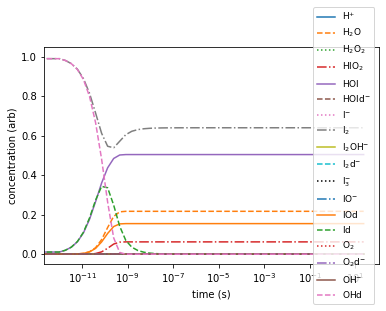

In [6]:
# Solve the ODEs

rsys=ReactionSystem.from_string(ReactionString)
odesys, extra = get_odesys(rsys)
tout = sorted(np.concatenate((np.linspace(0, 23), np.logspace(-12, 1)))) # Some Time Points
if __debug__:
    print("Time points: {}".format(tout))
c0 = defaultdict(float, {'I2': 1.0, 'OHd': 1.0 }) # Initial Concentrations
#result = odesys.integrate(tout, c0, atol=1e-12, rtol=1e-14)
result = odesys.integrate(tout, c0, integrator='gsl', atol=1e-8, rtol=1e-8)#,atol=1e-9, rtol=1e-20)##integrator='gsl', atol=1e-12, rtol=1e-14)#,nsteps=1000)
_ = result.plot(names=[k for k in rsys.substances])
_ = plt.legend(loc='right', prop={'size': 9}); _ = plt.xlabel('time (s)'); _ = plt.ylabel('concentration (arb)'); _= plt.xscale('log')
plt.savefig('reactionsystem.png')
#return 'reactionsystem.png'
